In [1]:
#importing required modules
import math
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss
from datetime import datetime, date

%matplotlib inline

In [2]:
#reading data 
advworks_data = pd.read_csv('AdvWorksCusts.csv')
bike_buyers = pd.read_csv('AW_BikeBuyer.csv')
avg_month_spend = pd.read_csv('AW_AveMonthSpend.csv')
advworks_test = pd.read_csv('AW_test.csv')
advworks_data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [3]:
bike_buyers.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [4]:
avg_month_spend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [5]:
#adding bike buyer and average month spend columns to the dataframe
advworks_data['BikeBuyer'] = bike_buyers['BikeBuyer']
advworks_data['AveMonthSpend'] = avg_month_spend['AveMonthSpend']
advworks_data.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AveMonthSpend'],
      dtype='object')

In [6]:
advworks_data.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
BikeBuyer                int64
AveMonthSpend            int64
dtype: object

In [7]:
print(advworks_data.shape)
print(advworks_data.CustomerID.unique().shape)

(16519, 25)
(16404,)


There are 115 duplicate cases. These need to be located and the duplicates removed. In this case, the last
instance will be kept.

In [8]:
#removing duplicate rows
advworks_data.drop_duplicates(subset = 'CustomerID',keep = 'last', inplace = True)
print(advworks_data.shape)

(16404, 25)


In [9]:
advworks_data.isnull().sum()

CustomerID                  0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16131
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
BikeBuyer                   0
AveMonthSpend               0
dtype: int64

The columns Title , Middle Name , Suffix and AddressLine2 have a lot of missing entries. So it makes sense to drop these

In [10]:
#dropping unneeded columns
advworks_data.drop(['Title','MiddleName','Suffix','AddressLine2'],axis=1,inplace = True)
advworks_data.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,0,89
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,1,117
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,0,123
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,0,50
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,1,95


In [11]:
#information such as mean , min , max etc about the dataset
print(advworks_data.describe())
print('\n' +'Median of Average Month Spend : '+ str(advworks_data['AveMonthSpend'].median(axis=0)))

         CustomerID  HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
count  16404.000000   16404.000000     16404.000000          16404.000000   
mean   20240.143136       0.674104         1.499756              0.991100   
std     5340.370705       0.468723         1.139135              1.514278   
min    11000.000000       0.000000         0.000000              0.000000   
25%    15617.750000       0.000000         1.000000              0.000000   
50%    20231.500000       1.000000         2.000000              0.000000   
75%    24862.250000       1.000000         2.000000              2.000000   
max    29482.000000       1.000000         4.000000              5.000000   

       TotalChildren   YearlyIncome     BikeBuyer  AveMonthSpend  
count   16404.000000   16404.000000  16404.000000   16404.000000  
mean        2.004511   78129.672397      0.332541      72.391002  
std         1.682318   39728.383493      0.471138      27.269921  
min         0.000000    9482.000000   

In [12]:
def count_unique(data, cols):
    for col in cols:
        print('\n' + col + ': ')
        print(data[col].value_counts())
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
count_unique(advworks_data, cat_cols)
biker_count = advworks_data['BikeBuyer'].value_counts()
print('\n'+'Bike buyer count : ')
print(biker_count)


CountryRegionName: 
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

Education: 
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

Occupation: 
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

Gender: 
M    8290
F    8114
Name: Gender, dtype: int64

MaritalStatus: 
M    8852
S    7552
Name: MaritalStatus, dtype: int64

HomeOwnerFlag: 
1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64

NumberCarsOwned: 
2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64

NumberChildrenAtHome: 
0    9924
1    2180
2    1455
3    1057
4     943
5     845
Name: NumberChildrenAtHome, dtype: int64

TotalChildren: 
0    4244
2 

We can see that **Fewer** customers have bought bikes than have not bought bikes

       Occupation  YearlyIncome
0        Clerical       49481.0
1      Management      118781.0
2          Manual       21722.0
3    Professional       99058.0
4  Skilled Manual       66471.5


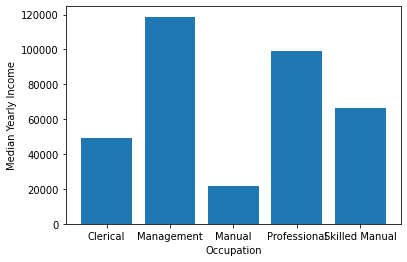

In [13]:
counts = advworks_data.groupby(['Occupation'], as_index = False)['YearlyIncome'].median()
print(counts)
temp = np.array([counts['Occupation'],counts['YearlyIncome']])
plt.bar(temp[0], temp[1])
plt.xlabel('Occupation')
plt.ylabel('Median Yearly Income')
plt.show()

This shows the order of Median yearly income by occupation is **Manual < Clerical < Skilled Manual < Professional < Management** 

In [15]:
birthday = []
for bday in advworks_data['BirthDate']:
    birthday.append(datetime.strptime(bday, "%Y-%m-%d").date())
survey_date = date(1998,1,1)
age_list = []
for bday in birthday:
    age_list.append(survey_date.year - bday.year - ((survey_date.month, survey_date.day) < (bday.month, bday.day)))
advworks_data['Age'] = age_list
advworks_data.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend,Age
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,M,M,1,0,0,2,137947,0,89,31
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,M,S,0,1,3,3,101141,1,117,32
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,M,M,1,1,3,3,91945,0,123,32
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,F,S,0,1,0,0,86688,0,50,29
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,F,S,1,4,5,5,92771,1,95,29


# Data Visualization

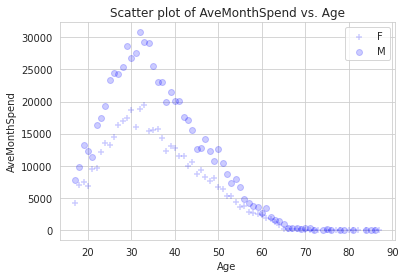

In [16]:
def plot_scatter_shape(data, cols, shape_col = 'Gender', col_y = 'AveMonthSpend', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = data[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = data[data[shape_col] == cat]
            sns.regplot(x=col, y=col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()

counts = advworks_data[['Gender', 'Age','AveMonthSpend']].groupby(['Gender', 'Age'], as_index = False)['AveMonthSpend'].sum()
plot_scatter_shape(counts, ['Age'])

This shows **Males aged between 25 and 45** have the highest Average month spend

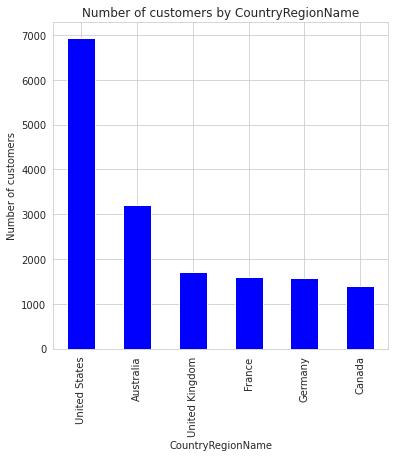

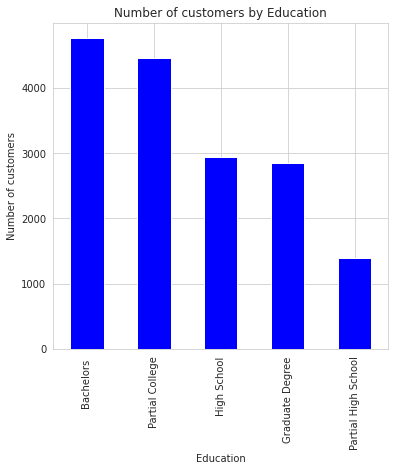

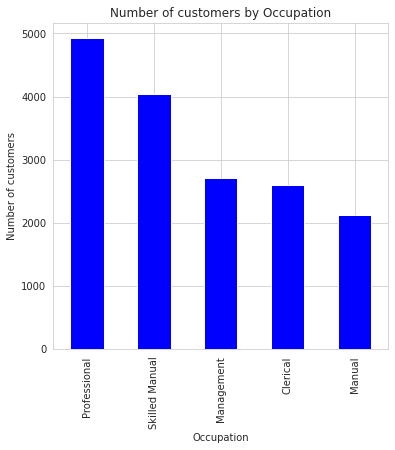

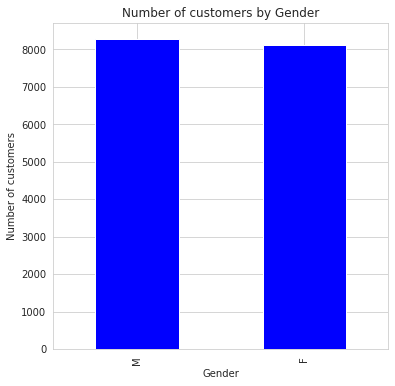

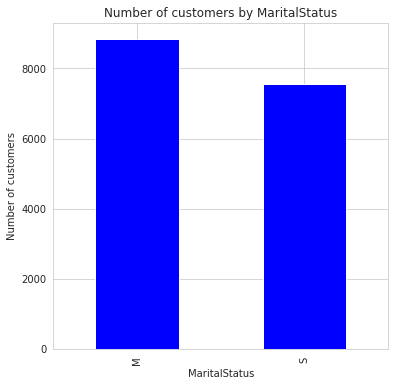

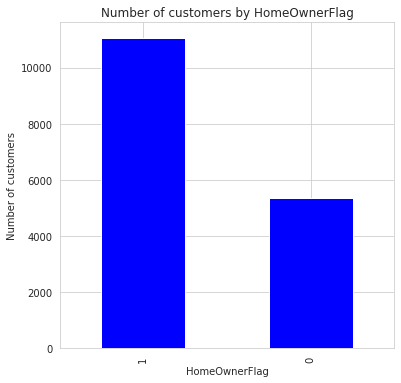

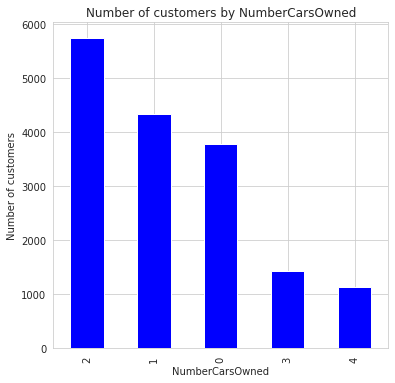

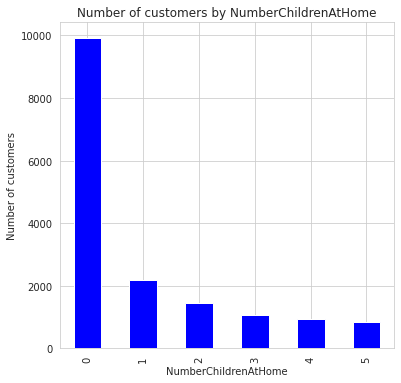

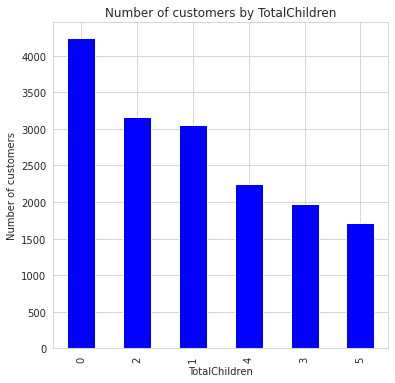

In [17]:
def plot_bars(advworks_data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = advworks_data[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of customers by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()

plot_bars(advworks_data, cat_cols)

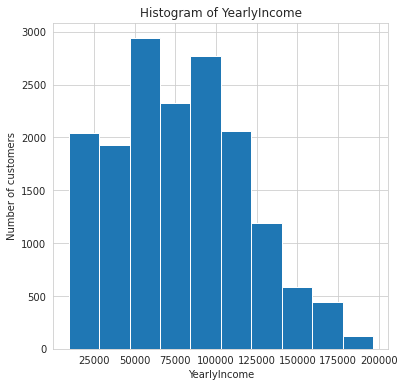

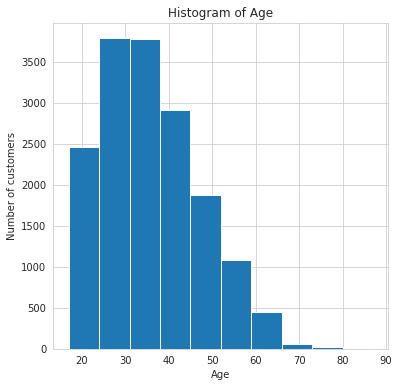

In [18]:
def plot_histogram(advworks_data, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        advworks_data[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()
        
num_cols = ['YearlyIncome','Age']    
plot_histogram(advworks_data, num_cols)

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


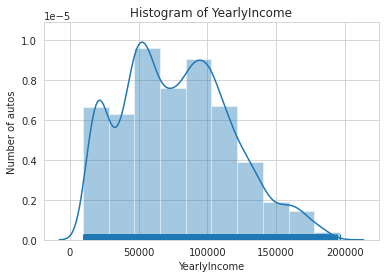

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


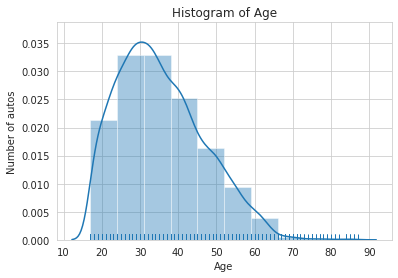

In [19]:
def plot_density_hist(advworks_data, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(advworks_data[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()
        
plot_density_hist(advworks_data, num_cols,hist=True)

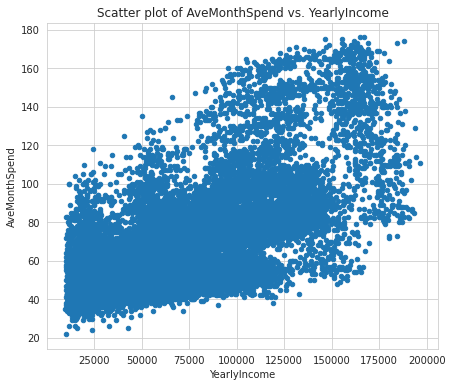

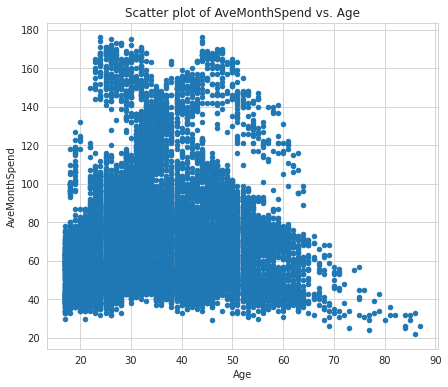

In [20]:
def plot_scatter(advworks_data, cols, col_y = 'AveMonthSpend',alpha=2):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        advworks_data.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

plot_scatter(advworks_data, num_cols)

There is a lot of overplotting in the above plot . The plot below gives a better description 

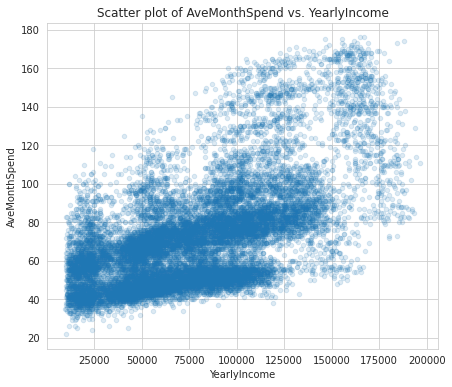

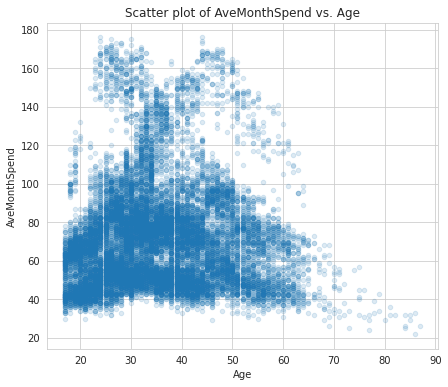

In [21]:
def plot_scatter_t(advworks_data, cols, col_y = 'AveMonthSpend', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        advworks_data.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter_t(advworks_data, num_cols, alpha = 0.15)

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


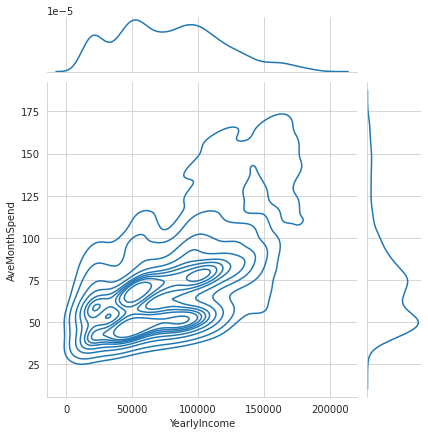

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


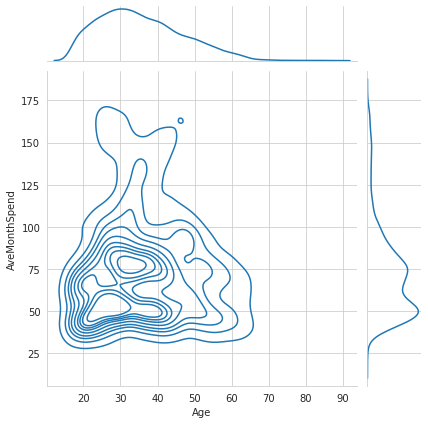

In [22]:
def plot_desity_2d(advworks_data, cols, col_y = 'AveMonthSpend', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=advworks_data, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(advworks_data, num_cols)

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


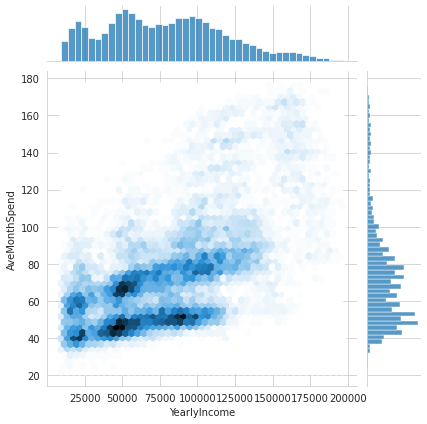

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


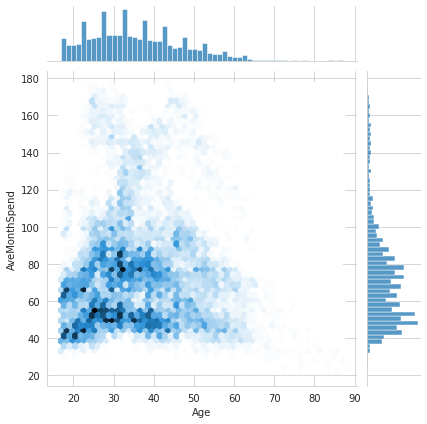

In [23]:
plot_desity_2d(advworks_data, num_cols, kind = 'hex')

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


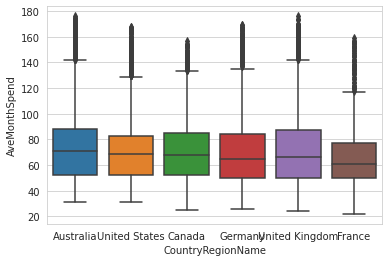

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


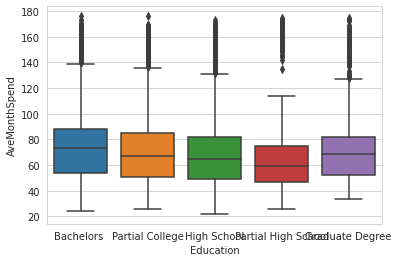

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


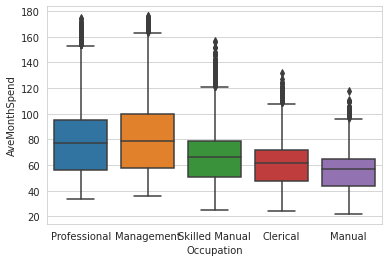

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


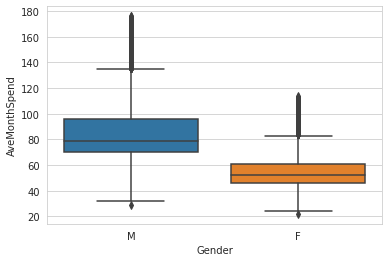

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


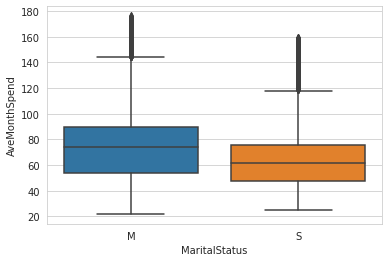

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


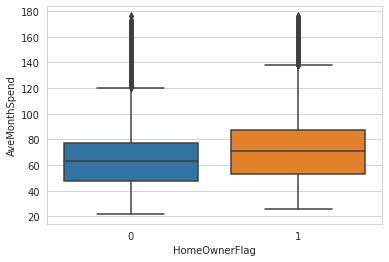

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


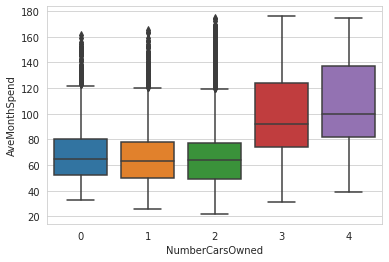

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


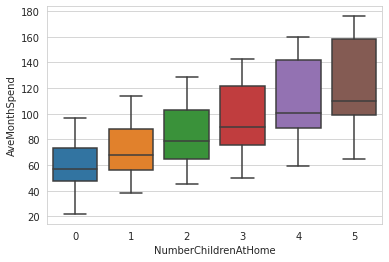

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


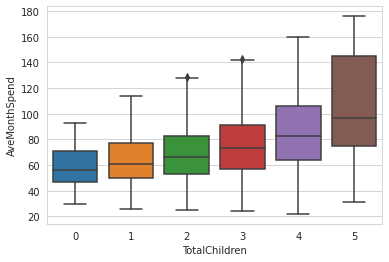

In [24]:
def plot_box(advworks_data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=advworks_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_box(advworks_data, cat_cols)

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


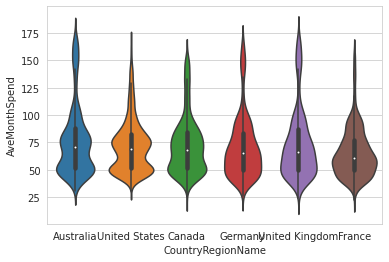

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


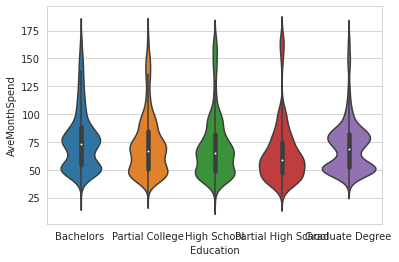

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


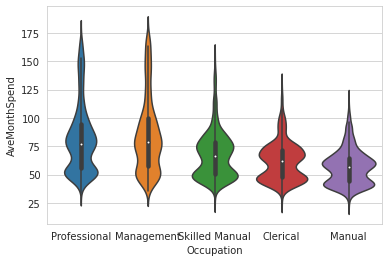

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


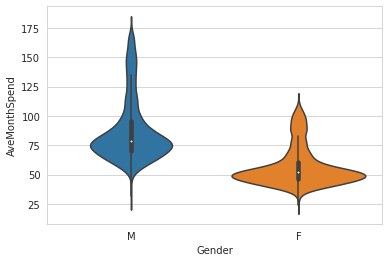

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


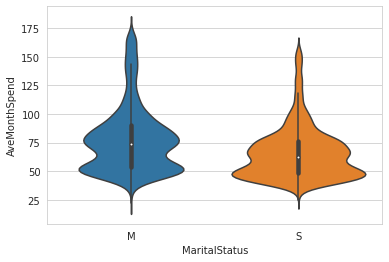

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


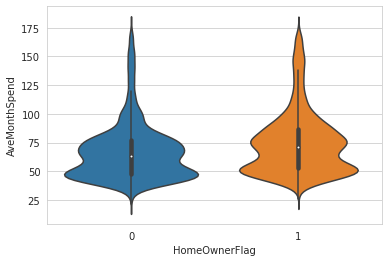

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


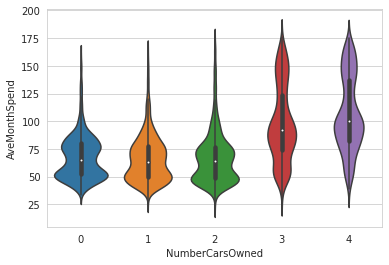

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


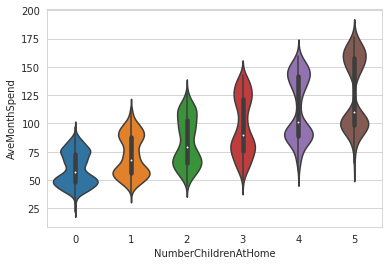

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


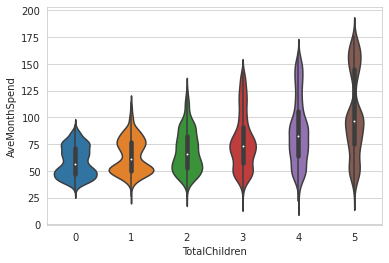

In [25]:
def plot_violin(advworks_data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=advworks_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(advworks_data, cat_cols)

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


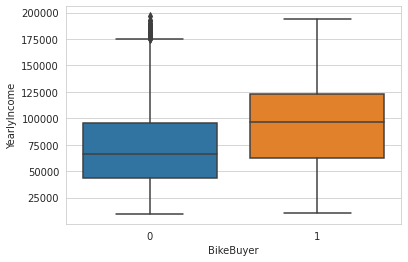

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


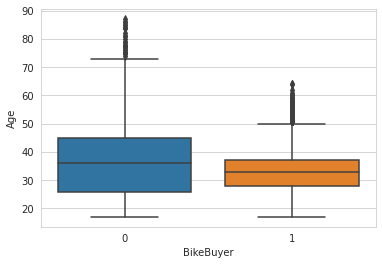

In [26]:
def plot_box(data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_box(advworks_data, num_cols)

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


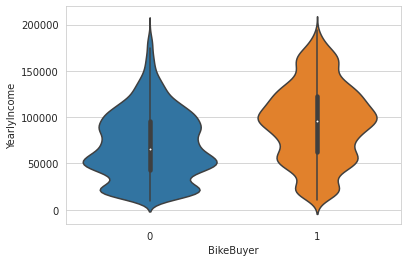

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


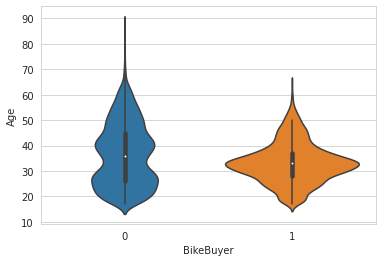

In [27]:
def plot_violin(advworks_data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=advworks_data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(advworks_data, num_cols)

CountryRegionName


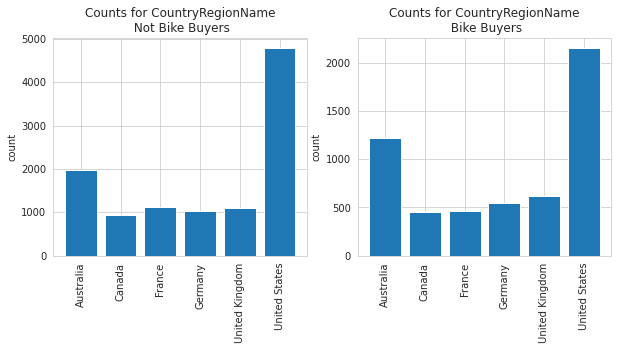

Education


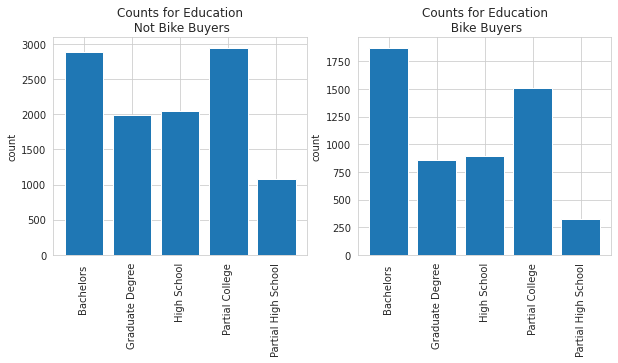

Occupation


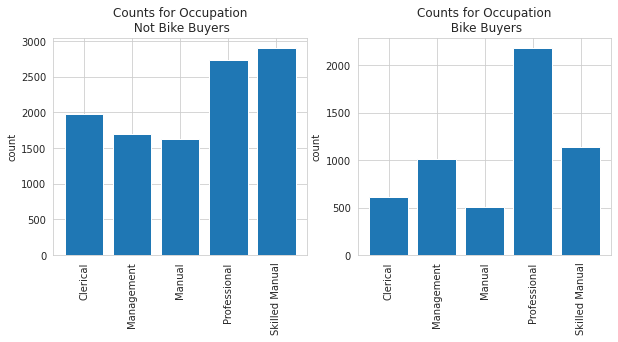

Gender


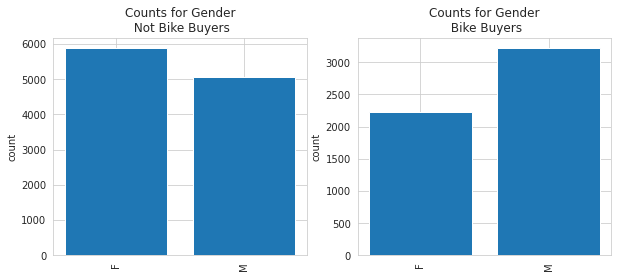

MaritalStatus


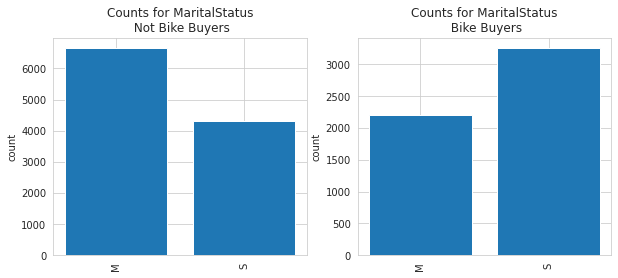

HomeOwnerFlag


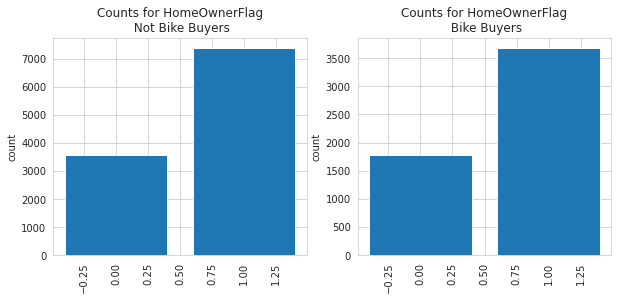

NumberCarsOwned


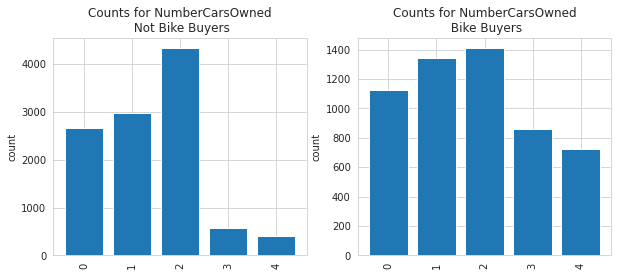

NumberChildrenAtHome


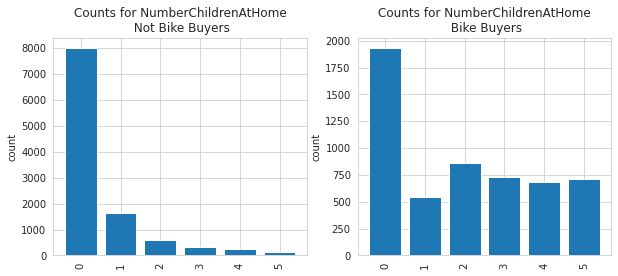

TotalChildren


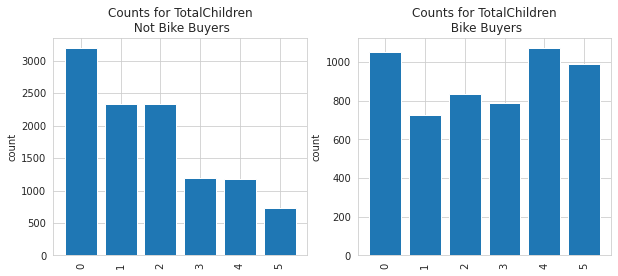

In [28]:
advworks_data['dummy'] = np.ones(shape = advworks_data.shape[0],dtype = int)
for col in cat_cols:
    print(col)
    counts = advworks_data[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Not Bike Buyers')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bike Buyers')
    plt.ylabel('count')
    plt.show()

# Application of regression

In [29]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

cat_cols = ['Education', 'Gender', 'MaritalStatus', 'NumberCarsOwned','NumberChildrenAtHome']
Features = encode_string(advworks_data['Occupation'])
for col in cat_cols:
    temp = encode_string(advworks_data[col])
    Features = np.concatenate([Features, temp], axis = 1)
print(Features.shape)
print(Features[:2, :])

(16404, 25)
[[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0.]]


In [30]:
Features = np.concatenate([Features, np.array(advworks_data[['YearlyIncome','Age']])], axis = 1)

In [31]:
nr.seed(9988)
labels = np.array(advworks_data['AveMonthSpend'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 2500)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
x_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        2.32280e+04, 1.80000e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.62270e+04, 5.90000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        5.77520e+04, 3.30000e+01],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        7.43780e+04, 3.60000e+01],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.23185e+05, 4.90000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.86520e+04, 3.20000e+01]])

In [32]:
scaler = preprocessing.StandardScaler().fit(x_train[:,25:])
x_train[:,25:] = scaler.transform(x_train[:,25:])
x_test[:,25:] = scaler.transform(x_test[:,25:])
print(x_train.shape)
x_train[:5,:]

(13904, 27)


array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.37983457, -1.55275963],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.30435909,  2.09730022],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.    

In [33]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [34]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 5.19382891e+08  5.19382888e+08  5.19382890e+08  5.19382891e+08
  5.19382891e+08 -2.19583419e+13 -2.19583419e+13 -2.19583419e+13
 -2.19583419e+13 -2.19583419e+13  4.25518506e+13  4.25518506e+13
 -2.50077287e+13 -2.50077287e+13  6.19931706e+13  6.19931706e+13
  6.19931706e+13  6.19931706e+13  6.19931706e+13 -5.75794701e+13
 -5.75794701e+13 -5.75794701e+13 -5.75794701e+13 -5.75794701e+13
 -5.75794701e+13  8.54043943e+00 -1.18365809e+00]


In [35]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 36.3828714111679
Root Mean Square Error = 6.0318215665889765
Mean Absolute Error    = 4.652805899106119
Median Absolute Error  = 3.662832269343852
R^2                    = 0.9507499943965445
Adjusted R^2           = 0.9502120695780601


/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


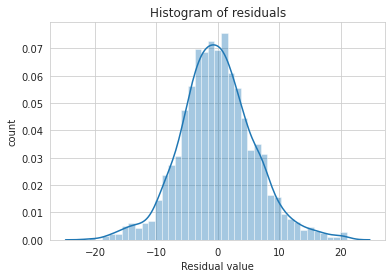

In [36]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)

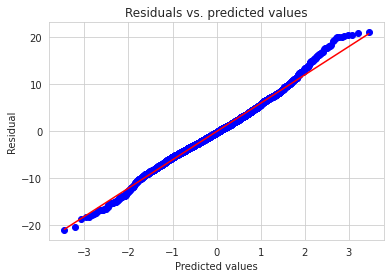

In [37]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

/home/adish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


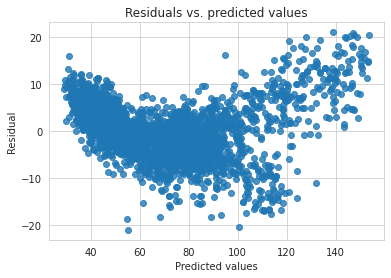

In [38]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score)

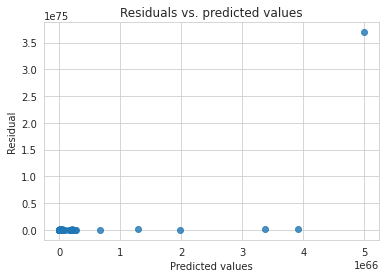

In [39]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform)

In [40]:
advworks_test

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24211,NaN,Sharon,A,Shan,NaN,5850 Westwood Dr,NaN,Peterborough,England,...,1/18/1969,Graduate Degree,Skilled Manual,F,S,0,0,0,0,97084
496,23627,NaN,Adrienne,NaN,Navarro,NaN,Buergermeister-ulrich-str 900,Einkaufsabteilung,Erlangen,Bayern,...,4/26/1950,Partial College,Management,F,S,0,4,4,4,110762
497,14500,NaN,Jasmine,C,Ward,NaN,1707 Willowwood Ct.,NaN,Torrance,California,...,11/18/1937,Bachelors,Management,F,S,0,4,3,3,138097
498,22223,NaN,Gabrielle,NaN,Parker,NaN,6857 Medina Drive,NaN,Mill Valley,California,...,4/11/1957,Partial College,Professional,F,M,1,1,0,2,101465


In [41]:
cat_cols = ['Education', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 'NumberChildrenAtHome']
Features = encode_string(advworks_test['Occupation'])
for col in cat_cols:
    temp = encode_string(advworks_test[col])
    Features = np.concatenate([Features, temp], axis = 1)
print(Features.shape)
print(Features[:2])

(500, 25)
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0.]]


In [42]:
birthday = []
for bday in advworks_test['BirthDate']:
    birthday.append(datetime.strptime(bday, "%m/%d/%Y").date())
survey_date = date(1998,1,1)
age_list = []
for bday in birthday:
    age_list.append(survey_date.year - bday.year - ((survey_date.month, survey_date.day) < (bday.month, bday.day)))
advworks_test['Age'] = age_list

In [43]:
Features = np.concatenate([Features, np.array(advworks_test[['YearlyIncome','Age']])], axis = 1)
Features[:,25:] = scaler.transform(Features[:,25:])

In [44]:
prediction = lin_mod.predict(Features) 
result = {'CustomerID':advworks_test['CustomerID'], 'Prediction1':prediction}
advworks_predictions = pd.DataFrame(result)
print(advworks_predictions)

     CustomerID  Prediction1
0         18988    42.365962
1         29135   105.469603
2         12156    48.887972
3         13749    88.226487
4         27780    60.221277
..          ...          ...
495       24211    48.639738
496       23627    91.171238
497       14500    83.254755
498       22223    55.863734
499       29068    30.702218

[500 rows x 2 columns]


In [45]:
advworks_predictions.to_csv('Problem1_predictions.csv')